# Le tp : Ingestion et stockage de données en python


Vous trouverez dans le dossier example_dataset (à dezipper) 3 jeux de données.
L'objectif de ce tp est pour chaque dataset :
- d'arriver à l'ouvrir et le lire en python
- de le lire en python.
- de trouver la structure de donnée adaptée en python, et de le stocker _proprement_ et _sans perdre d'information_ :
    - un seul dataframe pandas. 
    - numpy 
    - vidéo si séquence d'images
    - séquence sonore
    - classe custom 
    ...
- de décrire en une ou deux phrase ce que contient ce jeu de donnée

In [55]:
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames[:3]:
        print(os.path.join(dirname, filename))

.\Ingestion_de_dataset.ipynb
.\dataset_1\000.wav
.\dataset_1\001.wav
.\dataset_1\002.wav
.\dataset_2\CROPPED_INFRA_ZED_HD2K_LOSSLESS.avi
.\dataset_2\CROPPED_RGB_ZED_HD2K_LOSSLESS.avi
.\dataset_2\ZED_HD2K_LOSSLESS.avi
.\dataset_3\dataset.json


### Jeu de donnée 1

In [56]:
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import numpy as np

datasets_dir = "./dataset_1/"

audio, sr = librosa.load(datasets_dir + '000.wav', 22050, duration = 5)

C:\Users\BEP29\AppData\Local\Temp\ipykernel_10652\3118332300.py:8: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  audio, sr = librosa.load(datasets_dir + '000.wav', 22050, duration = 5)


In [57]:
len(audio)

110250

In [58]:
22050 * 5

110250

In [59]:
def audio_preprocessing(filepath):
    audio, sr = librosa.load(filepath, duration = 5)
    pad_len = 110250 - len(audio)
    audio = np.pad(audio, (0,pad_len))
    
    return audio

In [60]:
import glob
from tqdm import tqdm

audio_list = []

for i in tqdm(glob.glob(datasets_dir + '000.wav')):
    audio = audio_preprocessing(i)
    audio_list.append(audio)

100%|██████████| 1/1 [00:00<00:00, 333.12it/s]


In [61]:
audio_list = np.array(audio_list)
audio_list.shape

(1, 110250)

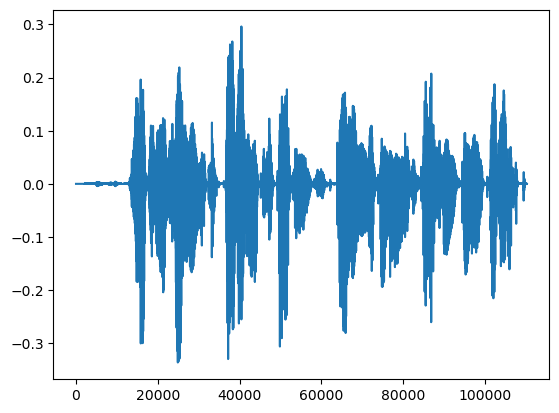

In [62]:
plt.plot(audio_list[0])

In [63]:
import wave

df = pd.DataFrame()

for i in range(4):
    wv = wave.open(datasets_dir + f'00{i}.wav', 'rb')
    samples = wv.getnframes()
    framerate = wv.getframerate()
    audio = wv.readframes(samples)
    
    ad_np_int16 = np.frombuffer(audio, dtype=np.int16)
    df = pd.concat([df, pd.DataFrame({f'wav00{i}': ad_np_int16})], axis=1)

In [64]:
df['time'] = (df.index + 1 / framerate)
display(df)

,wav000,wav001,wav002,wav003,time
0,0,58,-59,78,4.535147e-05
1,0,30,-128,2171,1.000045e+00
2,0,-67,-113,-60,2.000045e+00
3,0,103,-125,-1080,3.000045e+00
4,0,233,-104,-138,4.000045e+00
...,...,...,...,...,...
1323003,-574,-8,1,-174,1.323003e+06
1323004,-417,-90,2,-174,1.323004e+06
1323005,-138,-37,3,-180,1.323005e+06
1323006,-21,-22,-1,-182,1.323006e+06


In [65]:
def play(idx):
    import os
    from playsound import playsound
    print(f'Playing {idx}')
    playsound(os.path.abspath(datasets_dir + f'{idx}.wav'))

In [ ]:
play()

### Jeu de donnée  2

In [108]:
import cv2 as cv

datasets_dir = "./dataset_2/"

vd = datasets_dir + 'ZED_HD2K_LOSSLESS.avi'
cap = cv.VideoCapture(vd)

video_length = int(cap.get(cv.CAP_PROP_FRAME_COUNT)) 
print ("Number of frames: ", video_length)
# vidéo sous différents spectres

Number of frames:  500


In [109]:
ret, frame = cap.read()
w = int(cap.get(3))
h = int(cap.get(4))

dim = (h, int(w/2))

print ("Number of width: ", w)
print ("Number of height: ", h)
print ("Dimension: ", dim)

Number of width:  4416
Number of height:  1242
Dimension:  (1242, 2208)


In [110]:

fourcc = cv.VideoWriter_fourcc(*"DIVX")
writers_right = cv.VideoWriter(f"./dataset_2/CROPPED_INFRA_ZED_HD2K_LOSSLESS.avi", fourcc, 20.0, dim, isColor=True)
writers_left = cv.VideoWriter(f"./dataset_2/CROPPED_RGB_ZED_HD2K_LOSSLESS.avi", fourcc, 20.0, dim, isColor=True)

while (cap.isOpened()):
    
    ret, frame = cap.read()
    if not ret:
        break
    
    frame = cv.rotate(frame, cv.ROTATE_90_COUNTERCLOCKWISE)
    frame = frame[0:int(w/2), :]
    writers_right.write(frame)

    ret, frame = cap.read()
    if not ret:
        break
    
    frame2 = cv.rotate(frame, cv.ROTATE_90_COUNTERCLOCKWISE)
    frame2 = frame2[int(w/2):w, :]
    writers_left.write(frame2)


writers_right.release()
writers_left.release()
cap.release()
cv.destroyAllWindows()

In [30]:
# ret, frame = cap.read()
# h, w, _ = frame.shape

# parts = [(0, 500)]

# fourcc = cv2.VideoWriter_fourcc(*"XVID")
# writers = [cv2.VideoWriter(f"./dataset_2/ZED_HD2K_LOSSLESS_{start}-{end}.avi", fourcc, 20.0, (w, h)) for start, end in parts]

# f = 0
# while ret:
#     f += 1
    
#     for i, part in enumerate(parts):
#             start, end = part
#             if start <= f <= end:
#                 writers[i].write(frame)
#     ret, frame = cap.read()

# for writer in writers:
#     writer.release()

# cap.release()

### Jeu de donnée 3

In [99]:
import json
datasets_dir = "./dataset_3/"

df_raw = json.load(open(datasets_dir + 'dataset.json', 'r'))
df3 = pd.json_normalize(df_raw['smsCorpus']['message'])

display(df3)
# dataset de SMS en anglais

,@id,text.$,source.srcNumber.$,source.phoneModel.@manufactuer,source.phoneModel.@smartphone,source.userProfile.userID.$,source.userProfile.age.$,source.userProfile.gender.$,source.userProfile.nativeSpeaker.$,source.userProfile.country.$,...,source.userProfile.frequency.$,source.userProfile.inputMethod.$,destination.@country,destination.destNumber.$,messageProfile.@language,messageProfile.@time,messageProfile.@type,collectionMethod.@collector,collectionMethod.@method,collectionMethod.@time
0,10120,Bugis oso near wat...,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4
2,10122,I dunno until when... Lets go learn pilates...,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4
3,10123,Den only weekdays got special price... Haiz......,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4
4,10124,Meet after lunch la...,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55830,45714,I LOVE YOU TOO,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,2 to 5 SMS daily,Multi-tap,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3
55831,45715,C-YA,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,2 to 5 SMS daily,Multi-tap,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3
55832,45716,:-),8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,2 to 5 SMS daily,Multi-tap,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3
55833,45717,BE MY GUEST,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,2 to 5 SMS daily,Multi-tap,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3


In [100]:
df3.columns = [col.replace('.$', '').replace('@', '').replace('.', '_') for col in df3.columns]
display(df3)

,id,text,source_srcNumber,source_phoneModel_manufactuer,source_phoneModel_smartphone,source_userProfile_userID,source_userProfile_age,source_userProfile_gender,source_userProfile_nativeSpeaker,source_userProfile_country,...,source_userProfile_frequency,source_userProfile_inputMethod,destination_country,destination_destNumber,messageProfile_language,messageProfile_time,messageProfile_type,collectionMethod_collector,collectionMethod_method,collectionMethod_time
0,10120,Bugis oso near wat...,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4
2,10122,I dunno until when... Lets go learn pilates...,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4
3,10123,Den only weekdays got special price... Haiz......,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4
4,10124,Meet after lunch la...,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55830,45714,I LOVE YOU TOO,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,2 to 5 SMS daily,Multi-tap,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3
55831,45715,C-YA,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,2 to 5 SMS daily,Multi-tap,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3
55832,45716,:-),8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,2 to 5 SMS daily,Multi-tap,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3
55833,45717,BE MY GUEST,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,2 to 5 SMS daily,Multi-tap,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3


In [101]:
df3['date'] = df_raw['smsCorpus']['@date']
df3['version'] = df_raw['smsCorpus']['@version']
display(df3)

,id,text,source_srcNumber,source_phoneModel_manufactuer,source_phoneModel_smartphone,source_userProfile_userID,source_userProfile_age,source_userProfile_gender,source_userProfile_nativeSpeaker,source_userProfile_country,...,destination_country,destination_destNumber,messageProfile_language,messageProfile_time,messageProfile_type,collectionMethod_collector,collectionMethod_method,collectionMethod_time,date,version
0,10120,Bugis oso near wat...,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4,2015.03.09,1.2
1,10121,"Go until jurong point, crazy.. Available only ...",51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4,2015.03.09,1.2
2,10122,I dunno until when... Lets go learn pilates...,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4,2015.03.09,1.2
3,10123,Den only weekdays got special price... Haiz......,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4,2015.03.09,1.2
4,10124,Meet after lunch la...,51,unknown,unknown,51,unknown,unknown,unknown,SG,...,unknown,unknown,en,unknown,unknown,howyijue,unknown,2003/4,2015.03.09,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55830,45714,I LOVE YOU TOO,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3,2015.03.09,1.2
55831,45715,C-YA,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3,2015.03.09,1.2
55832,45716,:-),8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3,2015.03.09,1.2
55833,45717,BE MY GUEST,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,Apple (iPhone),yes,8a8d231273c70b423c002224d7054c4c776400d0cedab7...,16-20,male,yes,Serbia,...,unknown,unknown,en,unknown,send,Tao Chen,Web-based Transcription,2015/3,2015.03.09,1.2
